# 22230_Immidisetty Hemanth Sai Pavan_Data-Visualization_Assignment-1

## Bar Graph

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_birt=pd.read_csv('births.csv')
df_birt.head()

,Year,District Code,District Name,Neighborhood Code,Neighborhood,Gender,Number
0,2017,1,Ciutat Vella,1,el Raval,Boys,283
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Boys,56
2,2017,1,Ciutat Vella,3,la Barceloneta,Boys,51
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Boys,90
4,2017,2,Eixample,5,el Fort Pienc,Boys,117


In [3]:
df_le=pd.read_csv('life_expectancy.csv')
df_le.head()

,Neighborhood,2006-2010,2007-2011,2008-2012,2009-2013,2010-2014,Gender
0,el Raval,87.5,84.9,84.7,84.9,85.3,Female
1,el Barri Gòtic,88.0,84.3,84.4,87.5,84.4,Female
2,la Barceloneta,88.2,85.3,84.4,86.3,84.7,Female
3,"Sant Pere, Santa Caterina i la Ribera",88.9,85.9,86.1,85.5,85.3,Female
4,el Fort Pienc,89.7,87.1,87.2,87.7,86.7,Female


In [4]:
table=pd.pivot_table(data=df_birt,index="District Name",values="Number",aggfunc=np.sum)
table

,Number
District Name,
Ciutat Vella,4073
Eixample,10357
Gràcia,5263
Horta-Guinardó,6675
Les Corts,3127
No consta,11
Nou Barris,7062
Sant Andreu,6423
Sant Martí,10368


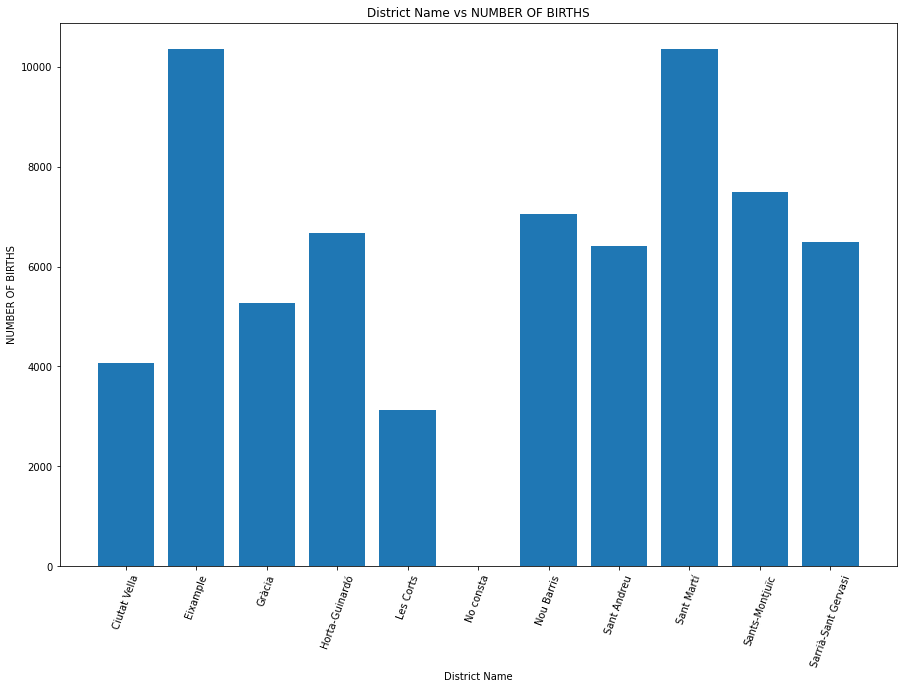

In [5]:
plt.figure(figsize=(15,10))
plt.bar(table.index,table["Number"])
plt.xticks(rotation=70)
plt.xlabel('District Name')
plt.ylabel('NUMBER OF BIRTHS')
plt.title('District Name vs NUMBER OF BIRTHS')
plt.savefig('hwbp1.png',dpi=300)
plt.show()

In [6]:
df1=pd.merge(df_birt,df_le,on="Neighborhood")
df1.head()

,Year,District Code,District Name,Neighborhood Code,Neighborhood,Gender_x,Number,2006-2010,2007-2011,2008-2012,2009-2013,2010-2014,Gender_y
0,2017,1,Ciutat Vella,1,el Raval,Boys,283,87.5,84.9,84.7,84.9,85.3,Female
1,2017,1,Ciutat Vella,1,el Raval,Boys,283,77.9,75.1,75.7,76.2,76.5,Male
2,2017,1,Ciutat Vella,1,el Raval,Girls,219,87.5,84.9,84.7,84.9,85.3,Female
3,2017,1,Ciutat Vella,1,el Raval,Girls,219,77.9,75.1,75.7,76.2,76.5,Male
4,2016,1,Ciutat Vella,1,el Raval,Boys,236,87.5,84.9,84.7,84.9,85.3,Female


In [7]:
table=pd.pivot_table(data=df1,index="District Name",values="2006-2010",aggfunc=np.average)
table

,2006-2010
District Name,
Ciutat Vella,83.875000
Eixample,85.583333
Gràcia,84.950000
Les Corts,86.666667
Sant Andreu,84.192857
Sant Martí,85.383333
Sants-Montjuïc,85.395588
Sarrià-Sant Gervasi,85.833333


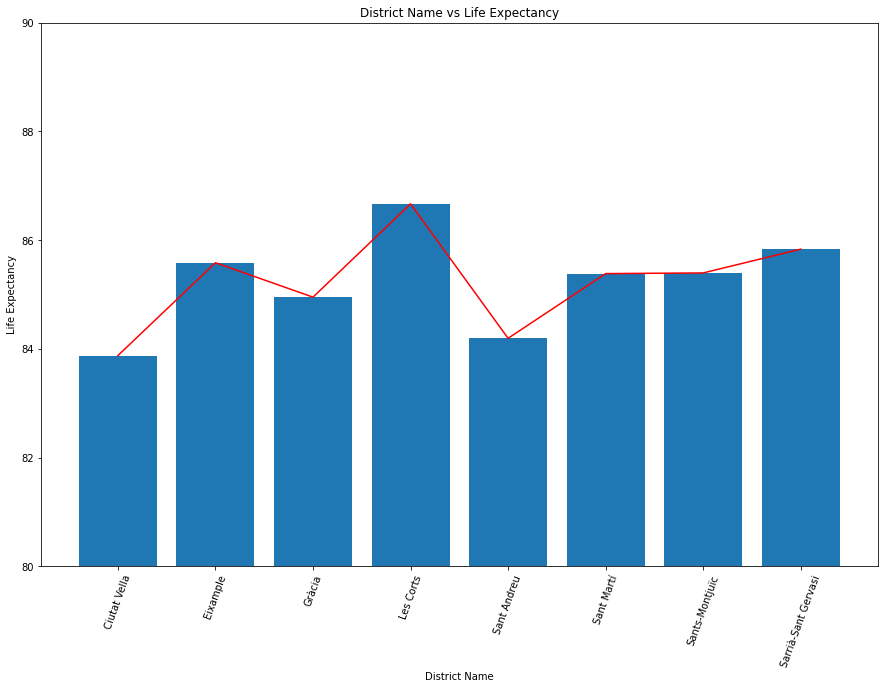

In [8]:
plt.figure(figsize=(15,10))
plt.bar(table.index,table["2006-2010"])
plt.plot(table.index,table["2006-2010"],color="red")
plt.ylim(80,90)
plt.xticks(rotation=70)
plt.xlabel('District Name')
plt.ylabel('Life Expectancy')
plt.title('District Name vs Life Expectancy')
plt.savefig('hwbp2.png',dpi=300)
plt.show()

## PIE CHART

In [9]:
d_Year={}
total=df1["Number"].sum()
for i in range(df1["Year"].nunique()):
    c=df1["Year"].unique()[i]
    c_order=df1[df1["Year"]==c]["Number"].sum()
    d_Year[c]=c_order/total
print(d_Year)

{2017: 0.19673201621843253, 2016: 0.20312523727809753, 2015: 0.20154591426098312, 2014: 0.200194378217491, 2013: 0.19840245402499582}


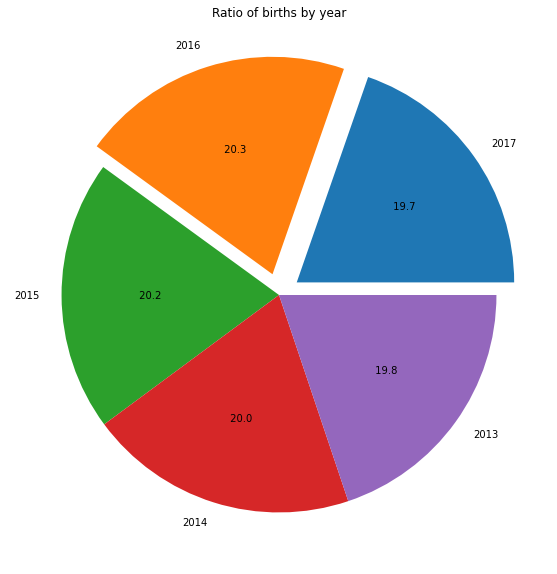

In [10]:
plt.figure(figsize=(15,10))
plt.pie([x*100 for x in d_Year.values()],labels=[x for x in d_Year.keys()],autopct='% 0.1f',explode=[0.1,0.1,0,0,0])
plt.title("Ratio of births by year")
plt.savefig("pie1hw.png")
plt.show()

In [11]:
d_DistrictName={}
total=df1["Number"].sum()
for i in range(df1["District Name"].nunique()):
    c=df1["District Name"].unique()[i]
    c_order=df1[df1["District Name"]==c]["Number"].sum()
    d_DistrictName[c]=c_order/total
print(d_DistrictName)

{'Ciutat Vella': 0.06185175623756663, 'Eixample': 0.15727931238705561, 'Sants-Montjuïc': 0.10791028230398932, 'Les Corts': 0.047485991101122234, 'Sarrià-Sant Gervasi': 0.09855583058723481, 'Gràcia': 0.07992285614493326, 'Horta-Guinardó': 0.10136520326190947, 'Nou Barris': 0.10724210718136398, 'Sant Andreu': 0.09753838210505535, 'Sant Martí': 0.14084827868976932}


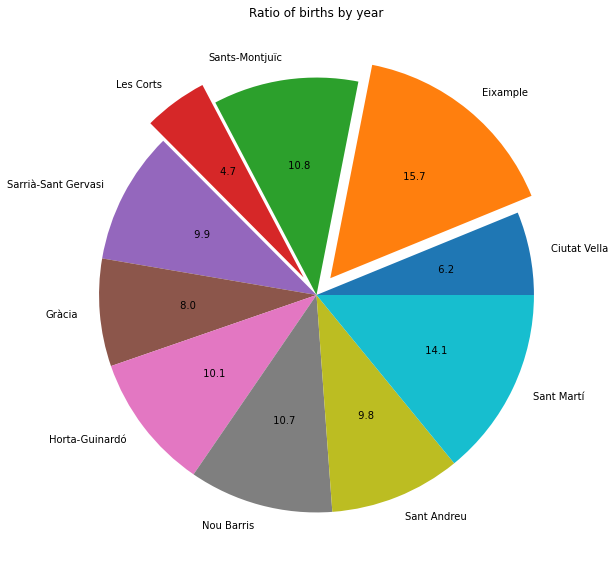

In [12]:
plt.figure(figsize=(15,10))
plt.pie([x*100 for x in d_DistrictName.values()],labels=[x for x in d_DistrictName.keys()],autopct='% 0.1f',explode=[0,0.1,0,0.1,0,0,0,0,0,0])
plt.title("Ratio of births by year")
plt.savefig("pie2hw.png")
plt.show()